In [24]:
import pandas as pd
import numpy as np
import re
pd.set_option('display.max_column', None)

In [25]:
f_data = pd.read_csv('C:\\Phy\\pandas\\fifa.csv')
f_data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Data Preprocessing

In [26]:
f_data.drop(f_data.columns[25:-1], axis = 1, inplace = True)
f_data.drop(f_data.columns[[3,4,5,9,14,15,16,19,21]], axis = 1, inplace = True)

In [27]:
f_data[13236:13237]

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
13236,177971,J. McNulty,33,62,62,Rochdale,€120K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
f_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 17 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Body Type                   18159 non-null object
Position                    18147 non-null object
Joined                      16654 non-null object
Contract Valid Until        17918 non-null object
Height                      18159 non-null object
Weight                      18159 non-null object
Release Clause              16643 non-null object
dtypes: float64(1), int64(4), object(12)
mem

In [29]:
 f_data.isnull().sum().sort_values(ascending = False)

Release Clause              1564
Joined                      1553
Contract Valid Until         289
Club                         241
Position                      60
International Reputation      48
Weight                        48
Preferred Foot                48
Body Type                     48
Height                        48
Wage                           0
Value                          0
Potential                      0
Overall                        0
Age                            0
Name                           0
ID                             0
dtype: int64

In [30]:
f_data[13236:13237]

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
13236,177971,J. McNulty,33,62,62,Rochdale,€120K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
f_data.dtypes

ID                            int64
Name                         object
Age                           int64
Overall                       int64
Potential                     int64
Club                         object
Value                        object
Wage                         object
Preferred Foot               object
International Reputation    float64
Body Type                    object
Position                     object
Joined                       object
Contract Valid Until         object
Height                       object
Weight                       object
Release Clause               object
dtype: object

#### Wage operation

In [32]:
f_data['Wage'] = list( map(lambda x:x.split('€')[1].split('K')[0], f_data['Wage']))
f_data

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,94,94,FC Barcelona,€110.5M,565,Left,5.0,Messi,RF,"Jul 1, 2004",2021,5'7,159lbs,€226.5M
1,20801,Cristiano Ronaldo,33,94,94,Juventus,€77M,405,Right,5.0,C. Ronaldo,ST,"Jul 10, 2018",2022,6'2,183lbs,€127.1M
2,190871,Neymar Jr,26,92,93,Paris Saint-Germain,€118.5M,290,Right,5.0,Neymar,LW,"Aug 3, 2017",2022,5'9,150lbs,€228.1M
3,193080,De Gea,27,91,93,Manchester United,€72M,260,Right,4.0,Lean,GK,"Jul 1, 2011",2020,6'4,168lbs,€138.6M
4,192985,K. De Bruyne,27,91,92,Manchester City,€102M,355,Right,4.0,Normal,RCM,"Aug 30, 2015",2023,5'11,154lbs,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,47,65,Crewe Alexandra,€60K,1,Right,1.0,Lean,CM,"May 3, 2017",2019,5'9,134lbs,€143K
18203,243165,N. Christoffersson,19,47,63,Trelleborgs FF,€60K,1,Right,1.0,Normal,ST,"Mar 19, 2018",2020,6'3,170lbs,€113K
18204,241638,B. Worman,16,47,67,Cambridge United,€60K,1,Right,1.0,Normal,ST,"Jul 1, 2017",2021,5'8,148lbs,€165K
18205,246268,D. Walker-Rice,17,47,66,Tranmere Rovers,€60K,1,Right,1.0,Lean,RW,"Apr 24, 2018",2019,5'10,154lbs,€143K


In [33]:
f_data['Wage'] = pd.to_numeric(f_data['Wage'], downcast = 'float')

#### Value operation

In [34]:
f_data['Value']= list(map(lambda x: float(x.split('€')[1].replace('M',''))*1000 if x.split('€')[1][-1]=='M' \
                     else (  x.split('€')[1].replace('K','') if x.split('€')[1][-1]=='K' else x) ,f_data['Value']))
f_data.tail()

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
18202,238813,J. Lundstram,19,47,65,Crewe Alexandra,60,1.0,Right,1.0,Lean,CM,"May 3, 2017",2019,5'9,134lbs,€143K
18203,243165,N. Christoffersson,19,47,63,Trelleborgs FF,60,1.0,Right,1.0,Normal,ST,"Mar 19, 2018",2020,6'3,170lbs,€113K
18204,241638,B. Worman,16,47,67,Cambridge United,60,1.0,Right,1.0,Normal,ST,"Jul 1, 2017",2021,5'8,148lbs,€165K
18205,246268,D. Walker-Rice,17,47,66,Tranmere Rovers,60,1.0,Right,1.0,Lean,RW,"Apr 24, 2018",2019,5'10,154lbs,€143K
18206,246269,G. Nugent,16,46,66,Tranmere Rovers,60,1.0,Right,1.0,Lean,CM,"Oct 30, 2018",2019,5'10,176lbs,€165K


In [35]:
f_data['Value'] = pd.to_numeric(f_data['Value'], errors = 'coerce')

#### Weight operation

In [36]:
f_data['Weight'] = f_data['Weight'].replace(np.nan, '000')
f_data[13236:13237]

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
13236,177971,J. McNulty,33,62,62,Rochdale,120.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000,NaN


In [37]:
f_data['Weight'] = list( map(lambda x:x.split('l')[0], f_data['Weight']))
f_data.head()

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,94,94,FC Barcelona,110500.0,565.0,Left,5.0,Messi,RF,"Jul 1, 2004",2021,5'7,159,€226.5M
1,20801,Cristiano Ronaldo,33,94,94,Juventus,77000.0,405.0,Right,5.0,C. Ronaldo,ST,"Jul 10, 2018",2022,6'2,183,€127.1M
2,190871,Neymar Jr,26,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,Neymar,LW,"Aug 3, 2017",2022,5'9,150,€228.1M
3,193080,De Gea,27,91,93,Manchester United,72000.0,260.0,Right,4.0,Lean,GK,"Jul 1, 2011",2020,6'4,168,€138.6M
4,192985,K. De Bruyne,27,91,92,Manchester City,102000.0,355.0,Right,4.0,Normal,RCM,"Aug 30, 2015",2023,5'11,154,€196.4M


In [38]:
li = f_data['Weight'].tolist()
wmean = []
for x in li:
    if x == '000':
        pass
    else:
         wmean.append(int(x))

wnum = pd.Series(wmean)
wmean_dict = pd.DataFrame({'mean':wmean})
wme = wmean_dict['mean'].mean()
len(wmean)

18159

In [39]:
f_data['Weight'] = f_data['Weight'].replace('000', wme )
f_data['Weight'][13236:13237]

13236    165.979
Name: Weight, dtype: object

In [40]:
f_data['Weight'] = pd.to_numeric(f_data['Weight'], errors = 'coerce')

#### Height operation 

In [41]:
f_data['Height'] = f_data['Height'].replace(np.nan, "0'0")
f_data[13236:13237]

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
13236,177971,J. McNulty,33,62,62,Rochdale,120.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0'0,165.979129,NaN


In [42]:
f_data['Height']=list(map(lambda x: float(x.split("'")[0]) + (float(x.split("'")[1])/12) , f_data['Height']))

In [43]:
f_data['Height']

0        5.583333
1        6.166667
2        5.750000
3        6.333333
4        5.916667
           ...   
18202    5.750000
18203    6.250000
18204    5.666667
18205    5.833333
18206    5.833333
Name: Height, Length: 18207, dtype: float64

In [44]:
f_data[13236:13237]

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
13236,177971,J. McNulty,33,62,62,Rochdale,120.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,165.979129,NaN


In [45]:
hli = f_data['Height'].tolist()
hmean = []
for x in hli:
    if x == 0.0:
        pass
    else:
         hmean.append((x))

hnum = pd.Series(hmean)
hmean_dict = pd.DataFrame({'mean':hnum})
hme = hmean_dict['mean'].mean()
hme

5.94677111441519

In [46]:
f_data['Height'] = f_data['Height'].replace(0.0, hme )
f_data['Height'][13236:13237]

13236    5.946771
Name: Height, dtype: float64

In [47]:
f_data['Height'] = pd.to_numeric(f_data['Height'], errors = 'coerce')

#### Release Clause operation

In [48]:
f_data['Release Clause'] = f_data['Release Clause'].replace(np.nan, '€0K')
f_data[13236:13237]

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
13236,177971,J. McNulty,33,62,62,Rochdale,120.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5.946771,165.979129,€0K


In [49]:
f_data['Release Clause']= list(map(lambda x: float(x.split('€')[1].replace('M',''))*1000 if x.split('€')[1][-1]=='M' \
                     else (  x.split('€')[1].replace('K','') if x.split('€')[1][-1]=='K' else x) ,f_data['Release Clause']))
f_data.tail()

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
18202,238813,J. Lundstram,19,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,Lean,CM,"May 3, 2017",2019,5.750000,134.0,143
18203,243165,N. Christoffersson,19,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,Normal,ST,"Mar 19, 2018",2020,6.250000,170.0,113
18204,241638,B. Worman,16,47,67,Cambridge United,60.0,1.0,Right,1.0,Normal,ST,"Jul 1, 2017",2021,5.666667,148.0,165
18205,246268,D. Walker-Rice,17,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,Lean,RW,"Apr 24, 2018",2019,5.833333,154.0,143
18206,246269,G. Nugent,16,46,66,Tranmere Rovers,60.0,1.0,Right,1.0,Lean,CM,"Oct 30, 2018",2019,5.833333,176.0,165


In [50]:
li = f_data['Release Clause'].tolist()
rmean = []
for x in li:
    if x == '0':
        pass
    else:
         rmean.append(int(x))

rnum = pd.Series(rmean)
rmean_dict = pd.DataFrame({'mean':rnum})
rme = rmean_dict['mean'].mean()
rme

4585.06080634501

In [51]:
f_data['Release Clause'] = f_data['Release Clause'].replace('0', rme )
f_data['Release Clause'][13236:13237]

13236    4585.06
Name: Release Clause, dtype: object

In [52]:
f_data['Release Clause'] = pd.to_numeric(f_data['Release Clause'], errors = 'coerce')

#### Joined operation

In [53]:
f_data['Joined'] = f_data['Joined'].replace(np.nan, 'a 1, 1111')
f_data[13236:13237]

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
13236,177971,J. McNulty,33,62,62,Rochdale,120.0,1.0,NaN,NaN,NaN,NaN,"a 1, 1111",NaN,5.946771,165.979129,4585.060806


In [54]:
f_data['Joined'] = list( map(lambda x:x.split(",")[1], f_data['Joined']))
f_data.head()

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,94,94,FC Barcelona,110500.0,565.0,Left,5.0,Messi,RF,2004,2021,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,94,94,Juventus,77000.0,405.0,Right,5.0,C. Ronaldo,ST,2018,2022,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,Neymar,LW,2017,2022,5.750000,150.0,228100.0
3,193080,De Gea,27,91,93,Manchester United,72000.0,260.0,Right,4.0,Lean,GK,2011,2020,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,91,92,Manchester City,102000.0,355.0,Right,4.0,Normal,RCM,2015,2023,5.916667,154.0,196400.0


In [55]:
li = f_data['Joined'].tolist()
jmean = []
for x in li:
    if x == ' 1111':
        pass
    else:
         jmean.append(int(x))

jnum = pd.Series(jmean)
jmean_dict = pd.DataFrame({'mean':jnum})
jme = jmean_dict['mean'].mean()
jme


2016.4598294703976

In [56]:
f_data['Joined'] = f_data['Joined'].replace( ' 1111' , int(jme))
f_data[13236:13237]

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
13236,177971,J. McNulty,33,62,62,Rochdale,120.0,1.0,NaN,NaN,NaN,NaN,2016,NaN,5.946771,165.979129,4585.060806


In [57]:
f_data['Joined'] = pd.to_numeric(f_data['Joined'], errors = 'coerce')

#### Contract Valid Until operation


In [58]:
f_data['Contract Valid Until'] = pd.to_datetime(f_data['Contract Valid Until'])
f_data

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,94,94,FC Barcelona,110500.0,565.0,Left,5.0,Messi,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,94,94,Juventus,77000.0,405.0,Right,5.0,C. Ronaldo,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,Neymar,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,91,93,Manchester United,72000.0,260.0,Right,4.0,Lean,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,91,92,Manchester City,102000.0,355.0,Right,4.0,Normal,RCM,2015,2023-01-01,5.916667,154.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,Lean,CM,2017,2019-01-01,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,Normal,ST,2018,2020-01-01,6.250000,170.0,113.0
18204,241638,B. Worman,16,47,67,Cambridge United,60.0,1.0,Right,1.0,Normal,ST,2017,2021-01-01,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,Lean,RW,2018,2019-01-01,5.833333,154.0,143.0


In [59]:
f_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 17 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Value                       17955 non-null float64
Wage                        18207 non-null float32
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Body Type                   18159 non-null object
Position                    18147 non-null object
Joined                      18207 non-null int64
Contract Valid Until        17918 non-null datetime64[ns]
Height                      18207 non-null float64
Weight                      18207 non-null float64
Release Clause              18207 non-null float64
dtypes: datetime64[ns](1), float

## EDA

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

### Density plot

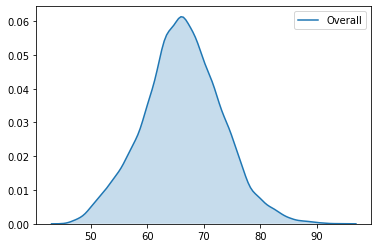

In [61]:
sns.kdeplot(f_data['Overall'], shade=True)

### Pair plot

C:\Users\91759\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\91759\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


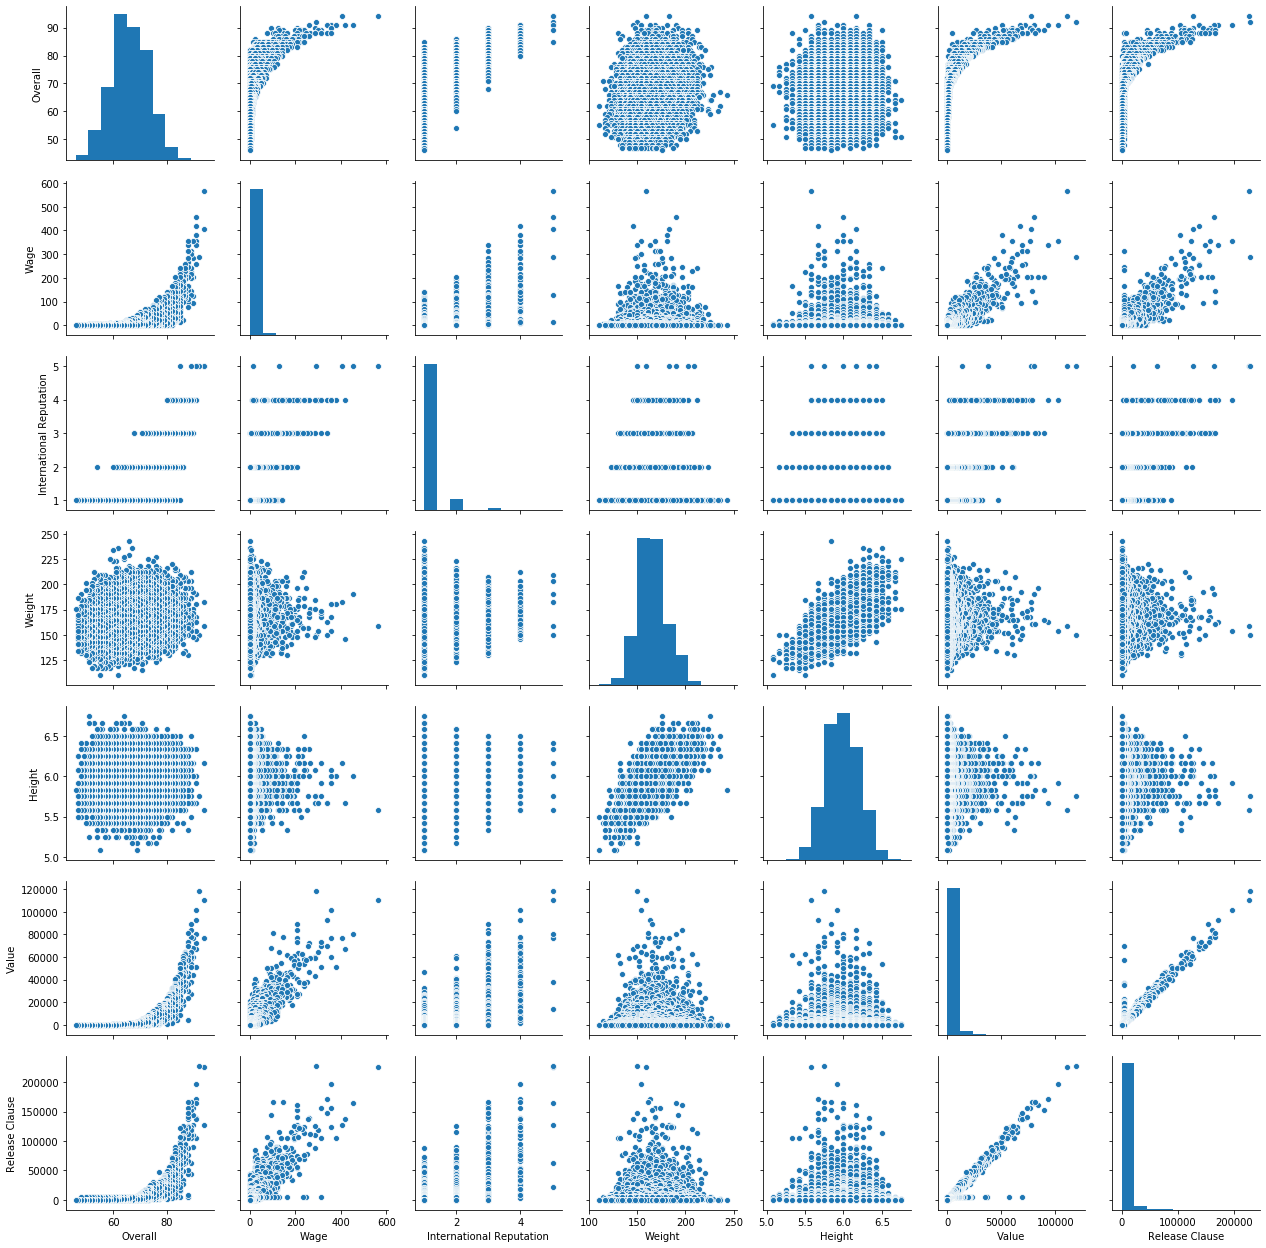

In [62]:
col = ['Overall','Wage','International Reputation','Weight','Height','Value','Release Clause']
sns.pairplot(f_data[col], height = 2.5)

### Top players according to overall and contract expires 2020


In [63]:
f_data1 = f_data[f_data['Contract Valid Until']=='2020-01-01'].sort_values('Overall',ascending = False).head(20)
f_data1

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
3,193080,De Gea,27,91,93,Manchester United,72000.0,260.0,Right,4.0,Lean,GK,2011,2020-01-01,6.333333,168.0,138600.0
6,177003,L. Modrić,32,91,91,Real Madrid,67000.0,420.0,Right,4.0,Lean,RCM,2012,2020-01-01,5.666667,146.0,137400.0
8,155862,Sergio Ramos,32,91,91,Real Madrid,51000.0,380.0,Right,4.0,Normal,RCB,2005,2020-01-01,6.000000,181.0,104600.0
5,183277,E. Hazard,27,91,91,Chelsea,93000.0,340.0,Right,4.0,Normal,LF,2012,2020-01-01,5.666667,163.0,172100.0
13,168542,David Silva,32,90,90,Manchester City,60000.0,285.0,Left,4.0,Normal,LCM,2010,2020-01-01,5.666667,148.0,111000.0
21,179813,E. Cavani,31,89,89,Paris Saint-Germain,60000.0,200.0,Right,4.0,Lean,LS,2013,2020-01-01,6.083333,170.0,111000.0
24,138956,G. Chiellini,33,89,89,Juventus,27000.0,215.0,Left,4.0,Normal,LCB,2005,2020-01-01,6.166667,187.0,44600.0
31,190460,C. Eriksen,26,88,91,Tottenham Hotspur,73500.0,205.0,Right,3.0,Lean,CAM,2013,2020-01-01,5.916667,168.0,141500.0
39,164240,Thiago Silva,33,88,88,Paris Saint-Germain,24000.0,165.0,Right,4.0,Normal,RCB,2012,2020-01-01,6.000000,181.0,44400.0
50,175943,D. Mertens,31,87,87,Napoli,45000.0,135.0,Right,3.0,Normal,RF,2013,2020-01-01,5.583333,134.0,76500.0


In [64]:
print('The Average Wage of the top 20 players whose contract expires in 2020 is :',f_data1['Wage'].mean())

The Average Wage of the top 20 players whose contract expires in 2020 is : 205.4499969482422


In [65]:
print('The Average age of the top 20 players whose contract expires in 2020 is :',int(f_data1['Age'].mean()),'years')

The Average age of the top 20 players whose contract expires in 2020 is : 30 years


### Co relation

In [66]:
cor = f_data1[['Overall','Value']].corr()
cor

,Overall,Value
Overall,1.000000,0.786717
Value,0.786717,1.000000


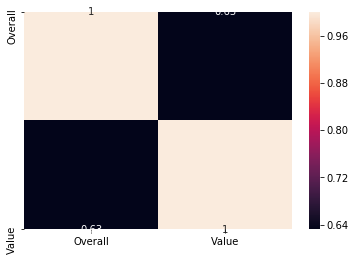

In [67]:
sns.heatmap(f_data[['Overall','Value']].corr(), annot = True)

### Group by according to overall rating

In [68]:
f_data2 = f_data.groupby(['Position']).apply(lambda x:x.sort_values('Overall', ascending = False))
f_data2

ID                Name  Age  Overall  Potential  \
Position                                                              
CAM      17     194765        A. Griezmann   27       89         90   
         31     190460          C. Eriksen   26       88         91   
         61     201942     Roberto Firmino   26       86         87   
         66     189596           T. Müller   28       86         86   
         74     176635             M. Özil   29       86         86   
...                ...                 ...  ...      ...        ...   
ST       18177  238550           R. Roache   18       48         69   
         18189  240160          A. Kaltner   18       47         61   
         18200  231381            J. Young   18       47         62   
         18203  243165  N. Christoffersson   19       47         63   
         18204  241638           B. Worman   16       47         67   

                              Club    Value   Wage Preferred Foot  \
Position                                                            
CAM      17        Atlético Madrid  78000.0  145.0           Left   
         31      Tottenham Hotspur  73500.0  205.0          Right   
         61              Liverpool  53000.0  195.0          Right   
         66      FC Bayern München  45000.0  135.0          Right   
         74                Arsenal  43500.0  190.0           Left   
...                            ...      ...    ...            ...   
ST       18177           Blackpool     70.0    1.0          Right   
         18189  SpVgg Unterhaching     60.0    1.0          Right   
         18200        Swindon Town     60.0    1.0           Left   
         18203      Trelleborgs FF     60.0    1.0          Right   
         18204    Cambridge United     60.0    1.0          Right   

                International Reputation Body Type Position  Joined  \
Position                                                              
CAM      17                          4.0      Lean      CAM    2014   
         31                          3.0      Lean      CAM    2013   
         61                          3.0      Lean      CAM    2015   
         66                          4.0      Lean      CAM    2008   
         74                          4.0      Lean      CAM    2013   
...                                  ...       ...      ...     ...   
ST       18177                       1.0      Lean       ST    2016   
         18189                       1.0      Lean       ST    2017   
         18200                       1.0      Lean       ST    2015   
         18203                       1.0    Normal       ST    2018   
         18204                       1.0    Normal       ST    2017   

               Contract Valid Until    Height  Weight  Release Clause  
Position                                                               
CAM      17              2023-01-01  5.750000   161.0        165800.0  
         31              2020-01-01  5.916667   168.0        141500.0  
         61              2023-01-01  5.916667   168.0        104700.0  
         66              2021-01-01  6.083333   165.0         74300.0  
         74              2021-01-01  5.916667   168.0         82700.0  
...                             ...       ...     ...             ...  
ST       18177           2019-01-01  5.833333   163.0           193.0  
         18189           2020-01-01  5.833333   165.0           125.0  
         18200           2019-01-01  5.750000   157.0           143.0  
         18203           2020-01-01  6.250000   170.0           113.0  
         18204           2021-01-01  5.666667   148.0           165.0  

[18147 rows x 17 columns]

### Goal Keepers

In [86]:
gk_f_data = f_data[f_data['Position']=='GK'].sort_values('Overall',ascending = False)
gk = gk_f_data.head(5)
gk

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
3,193080,De Gea,27,91,93,Manchester United,72000.0,260.0,Right,4.0,Lean,GK,2011,2020-01-01,6.333333,168.0,138600.0
9,200389,J. Oblak,25,90,93,Atlético Madrid,68000.0,94.0,Right,3.0,Normal,GK,2014,2021-01-01,6.166667,192.0,144500.0
18,192448,M. ter Stegen,26,89,92,FC Barcelona,58000.0,240.0,Right,3.0,Normal,GK,2014,2022-01-01,6.166667,187.0,123300.0
19,192119,T. Courtois,26,89,90,Real Madrid,53500.0,240.0,Left,4.0,Courtois,GK,2018,2024-01-01,6.500000,212.0,113700.0
22,167495,M. Neuer,32,89,89,FC Bayern München,38000.0,130.0,Right,5.0,Normal,GK,2011,2021-01-01,6.333333,203.0,62700.0


### Right Wingers

In [90]:
rw_f_data = f_data[(f_data['Position']=='RW')|(f_data['Position']=='RF')|(f_data['Position']=='RS')].sort_values('Overall',ascending = False)
rw = rw_f_data.head(5)
rw

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,94,94,FC Barcelona,110500.0,565.0,Left,5.0,Messi,RF,2004,2021-01-01,5.583333,159.0,226500.0
7,176580,L. Suárez,31,91,91,FC Barcelona,80000.0,455.0,Right,5.0,Normal,RS,2014,2021-01-01,6.000000,190.0,164000.0
50,175943,D. Mertens,31,87,87,Napoli,45000.0,135.0,Right,3.0,Normal,RF,2013,2020-01-01,5.583333,134.0,76500.0
56,218667,Bernardo Silva,23,86,91,Manchester City,59500.0,180.0,Left,2.0,Lean,RW,2017,2022-01-01,5.666667,141.0,114500.0
60,202652,R. Sterling,23,86,89,Manchester City,56500.0,195.0,Right,3.0,Lean,RW,2015,2023-01-01,5.583333,152.0,108800.0


### Left Wingers

In [92]:
lw_f_data = f_data[(f_data['Position']=='LW')|(f_data['Position']=='LF')|(f_data['Position']=='LS')].sort_values('Overall',ascending = False)
lw = lw_f_data.head(5)
lw

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
2,190871,Neymar Jr,26,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,Neymar,LW,2017,2022-01-01,5.750000,150.0,228100.0
5,183277,E. Hazard,27,91,91,Chelsea,93000.0,340.0,Right,4.0,Normal,LF,2012,2020-01-01,5.666667,163.0,172100.0
15,211110,P. Dybala,24,89,94,Juventus,89000.0,205.0,Left,3.0,Normal,LF,2015,2022-01-01,5.833333,165.0,153500.0
21,179813,E. Cavani,31,89,89,Paris Saint-Germain,60000.0,200.0,Right,4.0,Lean,LS,2013,2020-01-01,6.083333,170.0,111000.0
29,198219,L. Insigne,27,88,88,Napoli,62000.0,165.0,Right,3.0,Normal,LW,2010,2022-01-01,5.333333,130.0,105400.0


### Center Forwards

In [93]:
cf_f_data = f_data[(f_data['Position']=='ST')|(f_data['Position']=='CF')].sort_values('Overall',ascending = False)
cf = cf_f_data.head(5)
cf

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
1,20801,Cristiano Ronaldo,33,94,94,Juventus,77000.0,405.0,Right,5.0,C. Ronaldo,ST,2018,2022-01-01,6.166667,183.0,127100.0
10,188545,R. Lewandowski,29,90,90,FC Bayern München,77000.0,205.0,Right,4.0,Normal,ST,2014,2021-01-01,6.000000,176.0,127100.0
16,202126,H. Kane,24,89,91,Tottenham Hotspur,83500.0,205.0,Right,3.0,Normal,ST,2010,2024-01-01,6.166667,196.0,160700.0
23,153079,S. Agüero,30,89,89,Manchester City,64500.0,300.0,Right,4.0,Stocky,ST,2011,2021-01-01,5.666667,154.0,119300.0
36,173731,G. Bale,28,88,88,Real Madrid,60000.0,355.0,Left,4.0,Lean,ST,2013,2022-01-01,6.083333,181.0,123000.0


### Attacking Mid Fielders

In [105]:
amf_f_data = f_data[(f_data['Position']=='CAM')|(f_data['Position']=='RAM')|(f_data['Position']=='LAM')].sort_values('Overall',ascending = False)
amf = amf_f_data.head(5)
amf

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
17,194765,A. Griezmann,27,89,90,Atlético Madrid,78000.0,145.0,Left,4.0,Lean,CAM,2014,2023-01-01,5.750000,161.0,165800.000000
31,190460,C. Eriksen,26,88,91,Tottenham Hotspur,73500.0,205.0,Right,3.0,Lean,CAM,2013,2020-01-01,5.916667,168.0,141500.000000
28,198710,J. Rodríguez,26,88,89,FC Bayern München,69500.0,315.0,Left,4.0,Normal,LAM,2016,2019-06-30,5.916667,172.0,4585.060806
61,201942,Roberto Firmino,26,86,87,Liverpool,53000.0,195.0,Right,3.0,Lean,CAM,2015,2023-01-01,5.916667,168.0,104700.000000
66,189596,T. Müller,28,86,86,FC Bayern München,45000.0,135.0,Right,4.0,Lean,CAM,2008,2021-01-01,6.083333,165.0,74300.000000


### Center Defensive Mid Fielders

In [106]:
cdm_f_data = f_data[(f_data['Position']=='CDM')].sort_values('Overall',ascending = False)
cdm = cdm_f_data.head(5)
cdm

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
20,189511,Sergio Busquets,29,89,89,FC Barcelona,51500.0,315.0,Right,4.0,Lean,CDM,2008,2023-01-01,6.166667,168.0,105600.0
27,200145,Casemiro,26,88,90,Real Madrid,59500.0,285.0,Right,3.0,Normal,CDM,2013,2021-01-01,6.083333,185.0,126400.0
72,180206,M. Pjanić,28,86,86,Juventus,44000.0,180.0,Right,3.0,Normal,CDM,2016,2023-01-01,5.833333,159.0,72600.0
75,135507,Fernandinho,33,86,86,Manchester City,18000.0,185.0,Right,3.0,Lean,CDM,2013,2020-01-01,5.833333,148.0,33300.0
118,209499,Fabinho,24,84,88,Liverpool,34000.0,120.0,Right,3.0,Lean,CDM,2018,2023-01-01,6.166667,172.0,67200.0


### Center Mid Fielders

In [94]:
cm_f_data = f_data[(f_data['Position']=='CM')|(f_data['Position']=='RCM')|(f_data['Position']=='LCM')].sort_values('Overall',ascending = False)
cm = cm_f_data.head(5)
cm

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
4,192985,K. De Bruyne,27,91,92,Manchester City,102000.0,355.0,Right,4.0,Normal,RCM,2015,2023-01-01,5.916667,154.0,196400.0
6,177003,L. Modrić,32,91,91,Real Madrid,67000.0,420.0,Right,4.0,Lean,RCM,2012,2020-01-01,5.666667,146.0,137400.0
11,182521,T. Kroos,28,90,90,Real Madrid,76500.0,355.0,Right,4.0,Normal,LCM,2014,2022-01-01,6.000000,168.0,156800.0
13,168542,David Silva,32,90,90,Manchester City,60000.0,285.0,Left,4.0,Normal,LCM,2010,2020-01-01,5.666667,148.0,111000.0
52,171877,M. Hamšík,30,87,87,Napoli,46500.0,125.0,Right,3.0,Normal,LCM,2007,2020-01-01,6.000000,174.0,79100.0


### Right Mid Fielders

In [100]:
rm_f_data = f_data[(f_data['Position']=='RM')|(f_data['Position']=='RDM')].sort_values('Overall',ascending = False)
rm = rm_f_data.head(5)
rm

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
25,231747,K. Mbappé,19,88,95,Paris Saint-Germain,81000.0,100.0,Right,3.0,Lean,RM,2018,2022-01-01,5.833333,161.0,166100.0
26,209331,M. Salah,26,88,89,Liverpool,69500.0,255.0,Left,3.0,PLAYER_BODY_TYPE_25,RM,2017,2023-01-01,5.750000,157.0,137300.0
45,195864,P. Pogba,25,87,91,Manchester United,64000.0,210.0,Right,4.0,Normal,RDM,2016,2021-01-01,6.333333,185.0,123200.0
134,190584,Illarramendi,28,84,84,Real Sociedad,31000.0,51.0,Right,2.0,Normal,RDM,2015,2023-01-01,5.833333,165.0,65100.0
137,185020,José Callejón,31,84,84,Napoli,27500.0,105.0,Right,3.0,Lean,RM,2013,2020-01-01,5.833333,161.0,46800.0


### Left Mid Fielders

In [102]:
lm_f_data = f_data[(f_data['Position']=='LM')|(f_data['Position']=='LDM')].sort_values('Overall',ascending = False)
lm = lm_f_data.head(5)
lm

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
14,215914,N. Kanté,27,89,90,Chelsea,63000.0,225.0,Right,3.0,Lean,LDM,2016,2023-01-01,5.500000,159.0,121300.0
33,188567,P. Aubameyang,29,88,88,Arsenal,59000.0,265.0,Right,3.0,Lean,LM,2018,2021-01-01,6.166667,176.0,112100.0
58,208722,S. Mané,26,86,87,Liverpool,52000.0,195.0,Right,3.0,Lean,LM,2016,2023-01-01,5.750000,152.0,102700.0
68,188350,M. Reus,29,86,86,Borussia Dortmund,43500.0,100.0,Right,4.0,Lean,LM,2012,2023-01-01,5.916667,157.0,74000.0
65,190483,Douglas Costa,27,86,86,Juventus,46500.0,175.0,Left,3.0,Normal,LM,2018,2022-01-01,5.666667,154.0,76700.0


### Left Back

In [96]:
lb_f_data = f_data[(f_data['Position']=='LB')|(f_data['Position']=='LWB')].sort_values('Overall',ascending = False)
lb = lb_f_data.head(5)
lb

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
35,176676,Marcelo,30,88,88,Real Madrid,43000.0,285.0,Left,4.0,Normal,LB,2007,2022-01-01,5.750000,176.0,88200.0
49,189332,Jordi Alba,29,87,87,FC Barcelona,38000.0,250.0,Left,3.0,Normal,LB,2012,2020-01-01,5.583333,150.0,77900.0
64,191043,Alex Sandro,27,86,86,Juventus,36500.0,160.0,Left,3.0,Normal,LB,2015,2020-01-01,5.916667,176.0,60200.0
85,197445,D. Alaba,26,85,87,FC Bayern München,38000.0,110.0,Left,4.0,Lean,LB,2010,2021-01-01,5.916667,168.0,65600.0
106,164169,Filipe Luís,32,85,85,Atlético Madrid,21500.0,81.0,Left,3.0,Lean,LB,2015,2019-01-01,6.000000,163.0,44100.0


### Right Back

In [97]:
rb_f_data = f_data[(f_data['Position']=='RWB')|(f_data['Position']=='RB')].sort_values('Overall',ascending = False)
rb = rb_f_data.head(5)
rb

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
69,184432,Azpilicueta,28,86,86,Chelsea,35000.0,175.0,Right,3.0,Normal,RB,2012,2022-01-01,5.833333,168.0,64800.0
135,188377,K. Walker,28,84,84,Manchester City,24500.0,165.0,Right,3.0,Normal,RB,2017,2022-01-01,6.000000,154.0,45300.0
123,204963,Carvajal,26,84,87,Real Madrid,31500.0,185.0,Right,3.0,Stocky,RB,2013,2022-01-01,5.666667,161.0,66900.0
192,199564,Sergi Roberto,26,83,86,FC Barcelona,26500.0,170.0,Right,3.0,Normal,RB,2013,2022-01-01,5.833333,150.0,56300.0
216,177457,L. Bender,29,83,83,Bayer 04 Leverkusen,20000.0,82.0,Right,3.0,Lean,RB,2009,2021-01-01,6.083333,179.0,34000.0


### Center Back

In [104]:
cb_f_data = f_data[(f_data['Position']=='CB')|(f_data['Position']=='RCB')|(f_data['Position']=='LCB')].sort_values('Overall',ascending = False)
cb = cb_f_data.head(5)
cb

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
8,155862,Sergio Ramos,32,91,91,Real Madrid,51000.0,380.0,Right,4.0,Normal,RCB,2005,2020-01-01,6.000000,181.0,104600.0
12,182493,D. Godín,32,90,90,Atlético Madrid,44000.0,125.0,Right,3.0,Lean,CB,2010,2019-01-01,6.166667,172.0,90200.0
24,138956,G. Chiellini,33,89,89,Juventus,27000.0,215.0,Left,4.0,Normal,LCB,2005,2020-01-01,6.166667,187.0,44600.0
34,178603,M. Hummels,29,88,88,FC Bayern München,46000.0,160.0,Right,4.0,Normal,LCB,2016,2021-01-01,6.250000,203.0,75900.0
39,164240,Thiago Silva,33,88,88,Paris Saint-Germain,24000.0,165.0,Right,4.0,Normal,RCB,2012,2020-01-01,6.000000,181.0,44400.0


In [121]:
print('We can expext an average wage for top Goal keepers to be',gk['Wage'].mean(),'thousand')

We can expext an average wage for top Goal keepers to be 192.8000030517578 thousand


In [110]:
print('We can expext an average wage for top Right wingers to be',rw['Wage'].mean(),'thousand')

We can expext an average wage for top Right wingers to be 306.0 thousand


In [111]:
print('We can expext an average wage for top Left wingers to be',lw['Wage'].mean(),'thousand')

We can expext an average wage for top Left wingers to be 240.0 thousand


In [112]:
print('We can expext an average wage for top Center Forward to be',cf['Wage'].mean(),'thousand')

We can expext an average wage for top Center Forward to be 294.0 thousand


In [113]:
print('We can expext an average wage for top Attacking mid fielders to be',amf['Wage'].mean(),'thousand')

We can expext an average wage for top Attacking mid fielders to be 199.0 thousand


In [114]:
print('We can expext an average wage for top Center defensive mid fielders to be',cdm['Wage'].mean(),'thousand')

We can expext an average wage for top Center defensive mid fielders to be 217.0 thousand


In [115]:
print('We can expext an average wage for top Center mid fieldes to be',cm['Wage'].mean(),'thousand')

We can expext an average wage for top Center mid fieldes to be 144.1999969482422 thousand


In [116]:
print('We can expext an average wage for top Right mid fielders to be',rm['Wage'].mean(),'thousand')

We can expext an average wage for top Right mid fielders to be 144.1999969482422 thousand


In [117]:
print('We can expext an average wage for top Left mid fielders to be',lm['Wage'].mean(),'thousand')

We can expext an average wage for top Left mid fielders to be 192.0 thousand


In [118]:
print('We can expext an average wage for top Left backs to be',lb['Wage'].mean(),'thousand')

We can expext an average wage for top Left backs to be 177.1999969482422 thousand


In [119]:
print('We can expext an average wage for top Right Back to be',rb['Wage'].mean(),'thousand')

We can expext an average wage for top Right Back to be 155.39999389648438 thousand


In [120]:
print('We can expext an average wage for top Center back to be',cb['Wage'].mean(),'thousand')

We can expext an average wage for top Center back to be 209.0 thousand
